In [10]:
# %load visualize_filter.py
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet    #심플한 컨볼루션 신경망 클래스
from matplotlib.image import imread #이미지를 읽기 위한 함수
from common.layers import Convolution   #컨볼루션 레이어 구현을 위한 클래스

import sys, os
sys.path.append("..\\deep_learning_from_scratch")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet


def box_off():
    ax=plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_axis_off()  

In [3]:
def filter_show(filters, nx=8, margin=3, scale=10):
    """
    :param filters: 시각화할 컨볼루션 필터들이 저장된 배열. filters.shape는 (FN, C, FH, FW) 형식이어야 하며, 여기서 FN은 필터 개수, C는 채널 수 (예를 들어 컬러 이미지의 경우 3), FH와 FW는 각각 필터의 높이와 너비를 의미합니다.
    :param nx: 한 행에 배치할 필터의 개수입니다. 기본값은 8
    :param margin: 필터 사이의 여백 크기입니다.
    :param scale:  각 필터의 크기를 조정하는 인자입니다.
    :return: 
    """

    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape   #FN은 필터 개수, C는 채널 수 (예를 들어 컬러 이미지의 경우 3), FH와 FW는 각각 필터의 높이와 너비
    ny = int(np.ceil(FN / nx))  #필터를 격자 형태로 배치하기 위해, 세로 방향(ny)의 행 수를 계산합니다. FN을 nx로 나누고 올림하여 행 개수를 정합니다

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    """
    plt.figure()로 새로운 그림을 생성합니다.
    fig.subplots_adjust(...)는 서브플롯 간의 간격을 조정합니다. hspace는 수평 간격, wspace는 수직 간격을 의미합니다.
    """

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_axis_off()
        """
        for i in range(FN): 모든 필터에 대해 반복합니다.
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[]): ny x nx 그리드의 각 셀에 서브플롯을 추가합니다. xticks, yticks는 각 축의 눈금을 표시하지 않도록 설정합니다.
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest'): filters[i, 0]에서 첫 번째 채널의 필터를 이미지로 표시합니다. 그레이스케일 색맵을 사용하고, 보간법은 'nearest'로 설정하여 픽셀의 경계를 뚜렷하게 만듭니다.
        ax.set_axis_off(): 축을 숨깁니다.
        """

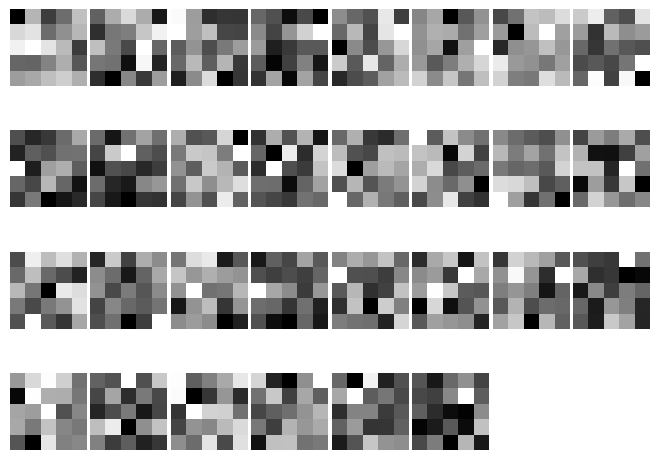

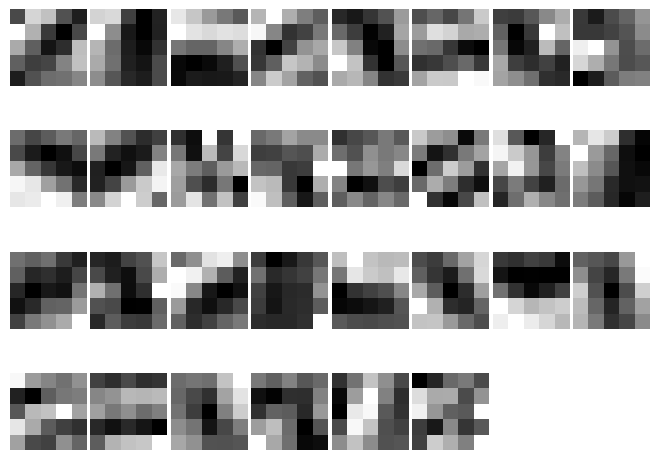

In [4]:
network = SimpleConvNet()
# 무작위(랜덤) 초기화 후의 가중치
filter_show(network.params['W1'])

# 학습된 가중치
network.load_params("params.pkl")
filter_show(network.params['W1'])

In [9]:
# # %load apply_filter.py

# network = SimpleConvNet(input_dim=(1,28,28), 
#                         conv_param = {'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
#                         hidden_size=100, output_size=10, weight_init_std=0.01)

# # 학습된 가중치
# network.load_params("params.pkl")

# filter_show(network.params['W1'], 16)

Image min value: 0.0
Image max value: 1.0
Image shape: (333, 250)


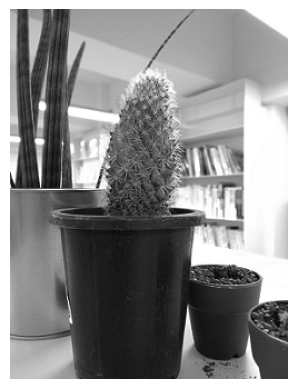

In [7]:
img = imread('../dataset/cactus_gray.png')
plt.imshow(img, cmap='gray')
plt.axis('off')
print("Image min value:", img.min())
print("Image max value:", img.max())
print("Image shape:", img.shape)

[[[[0.5647059  0.5686275  0.56078434 ... 1.         1.
    1.        ]
   [0.6117647  0.6        0.5882353  ... 1.         1.
    1.        ]
   [0.6666667  0.654902   0.6313726  ... 1.         1.
    1.        ]
   ...
   [0.74509805 0.7372549  0.7372549  ... 0.22745098 0.23137255
    0.22352941]
   [0.7411765  0.7411765  0.74509805 ... 0.23529412 0.23137255
    0.22745098]
   [0.74509805 0.7529412  0.7607843  ... 0.23137255 0.22352941
    0.23137255]]]]
(1, 1, 333, 250)
1 1 5 5
1 1 333 250
1 1 5 5
1 1 333 250
1 1 5 5
1 1 333 250
1 1 5 5
1 1 333 250
1 1 5 5
1 1 333 250
1 1 5 5
1 1 333 250
1 1 5 5
1 1 333 250
1 1 5 5
1 1 333 250
1 1 5 5
1 1 333 250
1 1 5 5
1 1 333 250
1 1 5 5
1 1 333 250
1 1 5 5
1 1 333 250
1 1 5 5
1 1 333 250
1 1 5 5
1 1 333 250
1 1 5 5
1 1 333 250
1 1 5 5
1 1 333 250


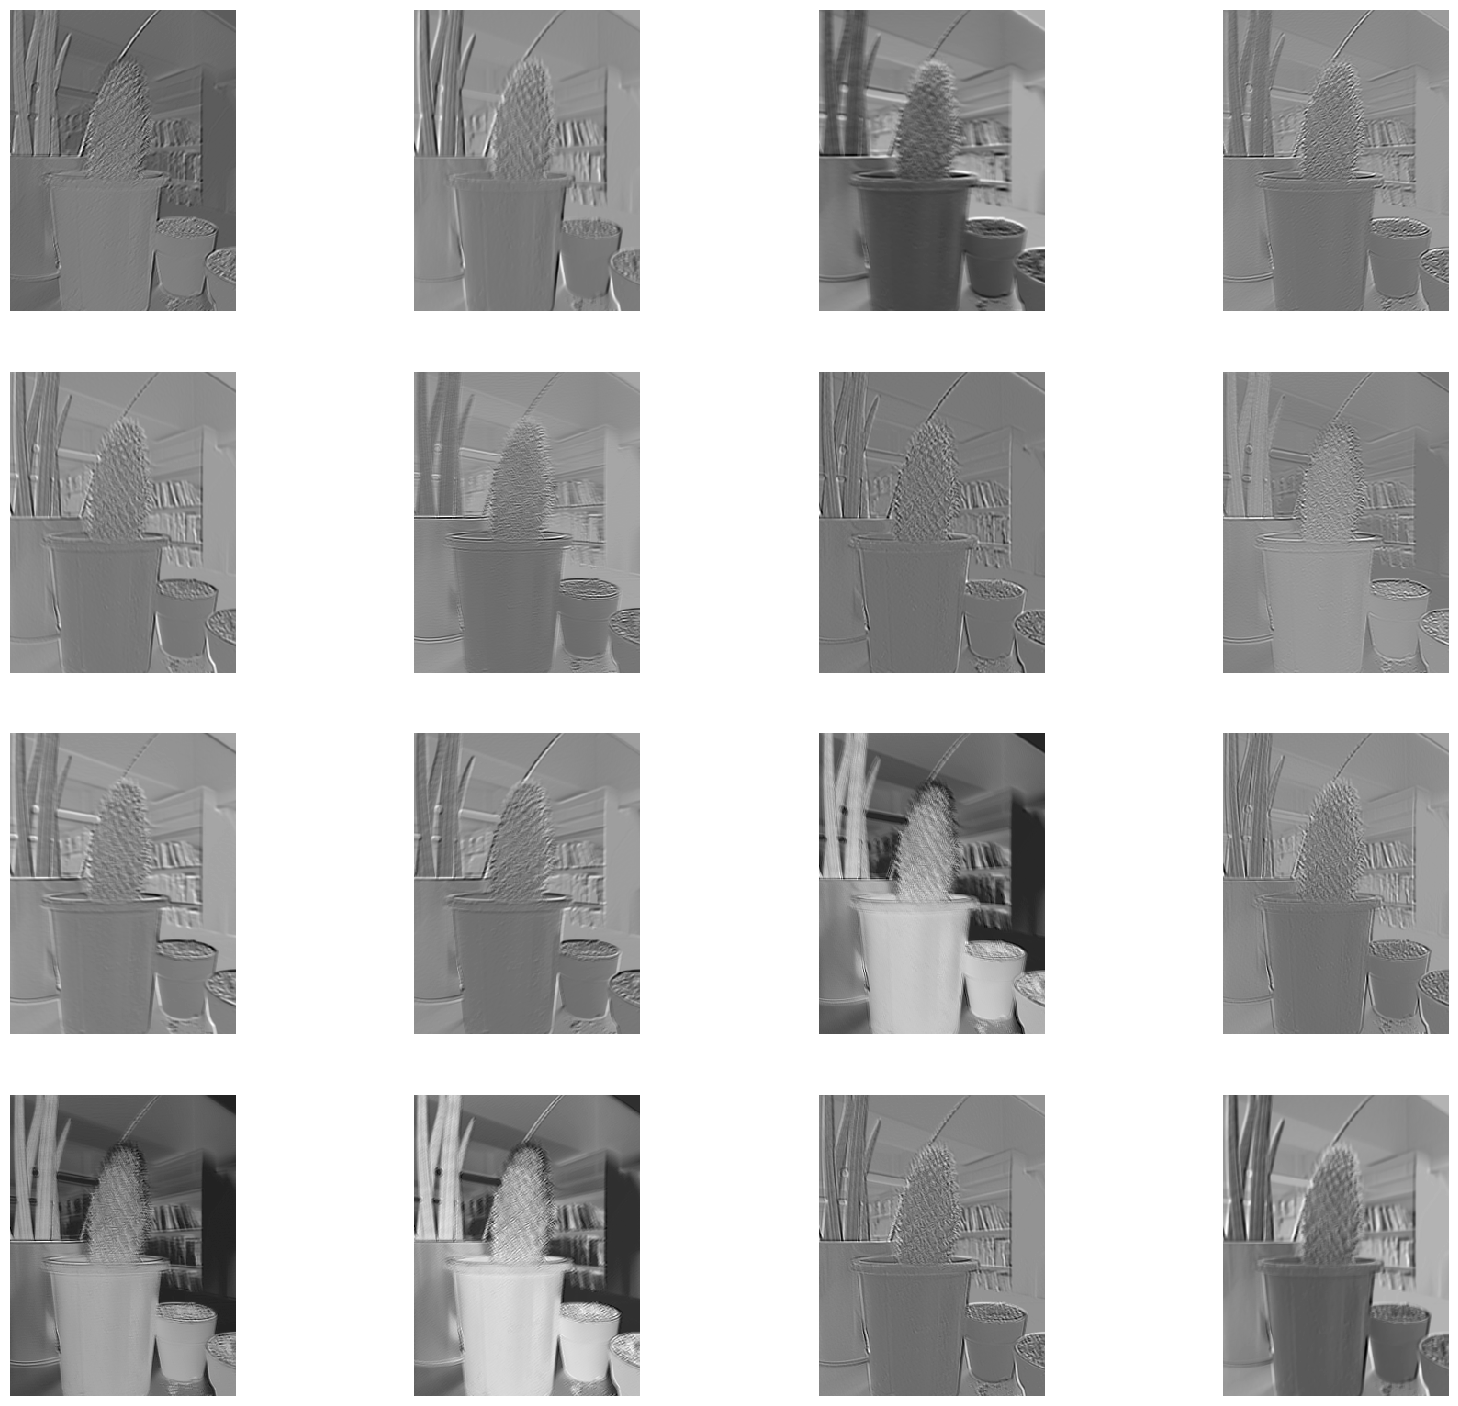

In [6]:
if img.ndim < 4:
    img = img.reshape(1, 1, *img.shape)
print(img)
print(img.shape)
fig = plt.figure(figsize=(20,18))

w_idx = 1
out_list = []
for i in range(16):
    w = network.params['W1'][i]
    b = 0  # network.params['b1'][i]
    """
    w_idx = 1: 필터 인덱스.
    out_list = []: 필터 출력 결과를 저장할 리스트를 초기화합니다.
    network.params['W1'][i]: 첫 번째 레이어의 i번째 필터(W1)를 가져옵니다. 여기서 W1은 첫 번째 컨볼루션 레이어의 가중치입니다. 이 필터는 4D 텐서로 (필터 개수, 채널 수, 필터 높이, 필터 너비) 형식일 것입니다.
    b = 0: 첫 번째 레이어의 편향을 가져오는 부분이지만, 이 코드에서는 편향값 b를 0으로 설정하고 있습니다.
    """
    w = w.reshape(1, *w.shape)
    #b = b.reshape(1, *b.shape)
    conv_layer = Convolution(w, b)
    out = conv_layer.forward(img)
    out = out.reshape(out.shape[2], out.shape[3])
    out_list.append(out)
    """
    w.reshape(1, *w.shape): 필터를 (1, 채널 수, 높이, 너비) 형식으로 변환합니다.
    conv_layer = Convolution(w, b): Convolution 클래스의 인스턴스를 생성하여 필터(w)와 편향(b)을 사용하여 컨볼루션 연산을 정의합니다.
    out = conv_layer.forward(img): 이미지를 필터와 함께 컨볼루션 연산을 수행하여 출력을 얻습니다. 이 출력은 (1, 채널 수, 높이, 너비) 형식입니다.
    out = out.reshape(out.shape[2], out.shape[3]): 출력의 높이와 너비를 평평하게 만들어서 2D로 변환합니다. 이를 통해 필터에 의해 생성된 각 특성 맵을 시각화할 수 있게 됩니다.
    """
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    ax.imshow(out, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_axis_off()
    """
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[]): 4x4 격자(총 16개의 서브플롯)를 만들어 각 필터의 출력을 표시할 공간을 생성합니다. xticks, yticks를 없애서 축을 표시하지 않습니다.
    ax.imshow(out, cmap=plt.cm.gray_r, interpolation='nearest'): out을 그레이스케일로 이미지화합니다. interpolation='nearest'는 픽셀의 경계를 뚜렷하게 표시하는 방식입니다.
    ax.set_axis_off(): 축을 숨깁니다.
    """

"\nfig.add_subplot(1,2,2): 두 번째 서브플롯을 생성합니다.\nnetwork.params['W1'][2,0]: 세 번째 필터를 가져옵니다. 첫 번째 필터가 network.params['W1'][0,0]라면, 여기서는 두 번째 필터와 세 번째 필터를 비교하고 있습니다.\n이 필터도 마찬가지로 그레이스케일로 시각화됩니다.\n"

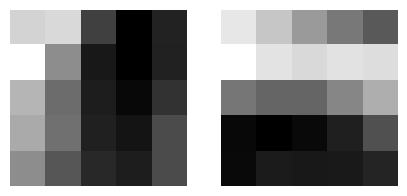

In [9]:
fig = plt.figure(figsize=(5,2.5))
"""
figsize=(5,2.5)로 그림의 크기를 설정합니다. 이 경우 가로가 5인치, 세로가 2.5인치인 그림이 생성됩니다
"""
# 첫 번째 필터 시각화
ax = fig.add_subplot(1,2,1)
ax.imshow(network.params['W1'][1,0], cmap=plt.cm.gray_r, interpolation='nearest')
ax.set_axis_off() 
"""
fig.add_subplot(1,2,1): 1행 2열의 서브플롯 중 첫 번째 서브플롯을 생성합니다. 즉, 두 개의 이미지를 나란히 보여주는 구조입니다.
network.params['W1'][1,0]: 첫 번째 필터(W1)의 두 번째 필터를 가져옵니다. 이 필터는 3D 텐서로 되어 있을 가능성이 높으므로, 여기서는 채널이 0인 경우를 선택한 것 같습니다.
ax.imshow(...): 필터를 그레이스케일로 표시하고, interpolation='nearest'를 설정하여 픽셀의 경계가 뚜렷하게 보이게 합니다.
ax.set_axis_off(): 축을 숨깁니다.
"""
# 두 번째 필터 시각화
ax = fig.add_subplot(1,2,2)
ax.imshow(network.params['W1'][2,0], cmap=plt.cm.gray_r, interpolation='nearest')
ax.set_axis_off() 
"""
fig.add_subplot(1,2,2): 두 번째 서브플롯을 생성합니다.
network.params['W1'][2,0]: 세 번째 필터를 가져옵니다. 첫 번째 필터가 network.params['W1'][0,0]라면, 여기서는 두 번째 필터와 세 번째 필터를 비교하고 있습니다.
이 필터도 마찬가지로 그레이스케일로 시각화됩니다.
"""

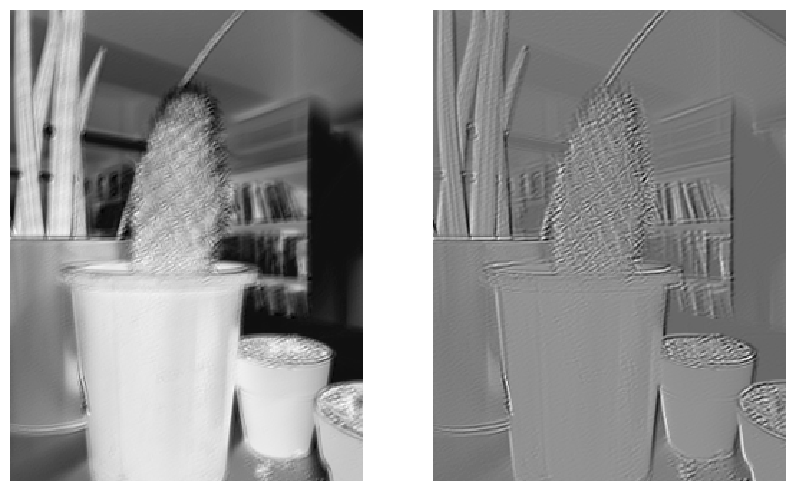

In [13]:
fig = plt.figure(figsize=(10,8))
"""
figsize=(10,8)은 출력할 그림의 크기를 설정하는 부분입니다. 이 경우 가로 10인치, 세로 8인치의 크기로 설정됩니다.
"""
ax = fig.add_subplot(1,2,1)
ax.imshow(out_list[1], cmap=plt.cm.gray_r, interpolation='nearest')
ax.set_axis_off() 
"""
fig.add_subplot(1,2,1): 1행 2열의 서브플롯에서 첫 번째 서브플롯을 추가합니다.
out_list[1]: out_list에서 두 번째 출력을 선택하여 시각화합니다.
ax.imshow(...): 그레이스케일로 출력 이미지를 시각화하며, interpolation='nearest'로 설정하여 픽셀 경계가 뚜렷하게 보이도록 합니다.
ax.set_axis_off(): 축을 숨깁니다.
"""
ax = fig.add_subplot(1,2,2)
ax.imshow(out_list[2], cmap=plt.cm.gray_r, interpolation='nearest')
ax.set_axis_off() 
"""
fig.add_subplot(1,2,2): 두 번째 서브플롯을 추가합니다.
out_list[2]: out_list에서 세 번째 출력을 선택하여 시각화합니다.
ax.imshow(...): 동일하게 그레이스케일로 출력을 시각화하고, 축을 숨깁니다.
"""